In [13]:
import pandas as pd

data = pd.read_csv('C:/Users/malco/aaPythonPersonalNotebook/DBS Data Scientist Treasury and Market Operations/dataset/adult_data_RenameCol_MinMax_LE.csv',index_col = 0)
data = data.iloc[:10000,6:-1]
print(data.head())
data

   workclass  education  marital-status  occupation  relationship  race  sex  \
0          6          9               2           4             0     4    1   
1          4         11               0           6             1     4    1   
2          4          1               2           6             0     2    1   
3          4          9               2          10             5     2    0   
4          4         12               2           4             5     4    0   

   native-country  
0              39  
1              39  
2              39  
3               5  
4              39  


,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,6,9,2,4,0,4,1,39
1,4,11,0,6,1,4,1,39
2,4,1,2,6,0,2,1,39
3,4,9,2,10,5,2,0,5
4,4,12,2,4,5,4,0,39
...,...,...,...,...,...,...,...,...
9995,4,11,4,8,3,4,0,39
9996,4,15,4,14,3,2,1,39
9997,4,3,2,8,0,4,1,26
9998,4,15,0,12,4,4,0,39


In [14]:
from sklearn.cluster import KMeans
clusters = 8 #7

kmeans = KMeans(n_clusters = clusters)
kmeans.fit(data)

print(kmeans.labels_)

[3 0 6 ... 4 7 5]


In [15]:
from sklearn.decomposition import PCA

pca = PCA(3)
pca.fit(data)

pca_data = pd.DataFrame(pca.transform(data))

print(pca_data.head())

           0         1         2
0  -2.343084 -2.129751  1.645029
1  -2.403210 -0.566533 -0.512877
2  -1.942066  0.432630  9.445283
3  31.752994  2.638776 -0.262101
4  -2.471893 -2.822935 -1.277212


In [16]:
from matplotlib import colors as mcolors
import math

''' Generating different colors in ascending order of their hsv values '''
colors = list(zip(*sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
for name, color in dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).items())))[1]

# number of steps to taken generate n(clusters) colors
skips = math.floor(len(colors[5 : -5])/clusters)
cluster_colors = colors[5 : -5 : skips]
cluster_colors

('grey',
 'r',
 'darkorange',
 'palegoldenrod',
 'lightgreen',
 'lightcyan',
 'dodgerblue',
 'mediumslateblue',
 'deeppink')

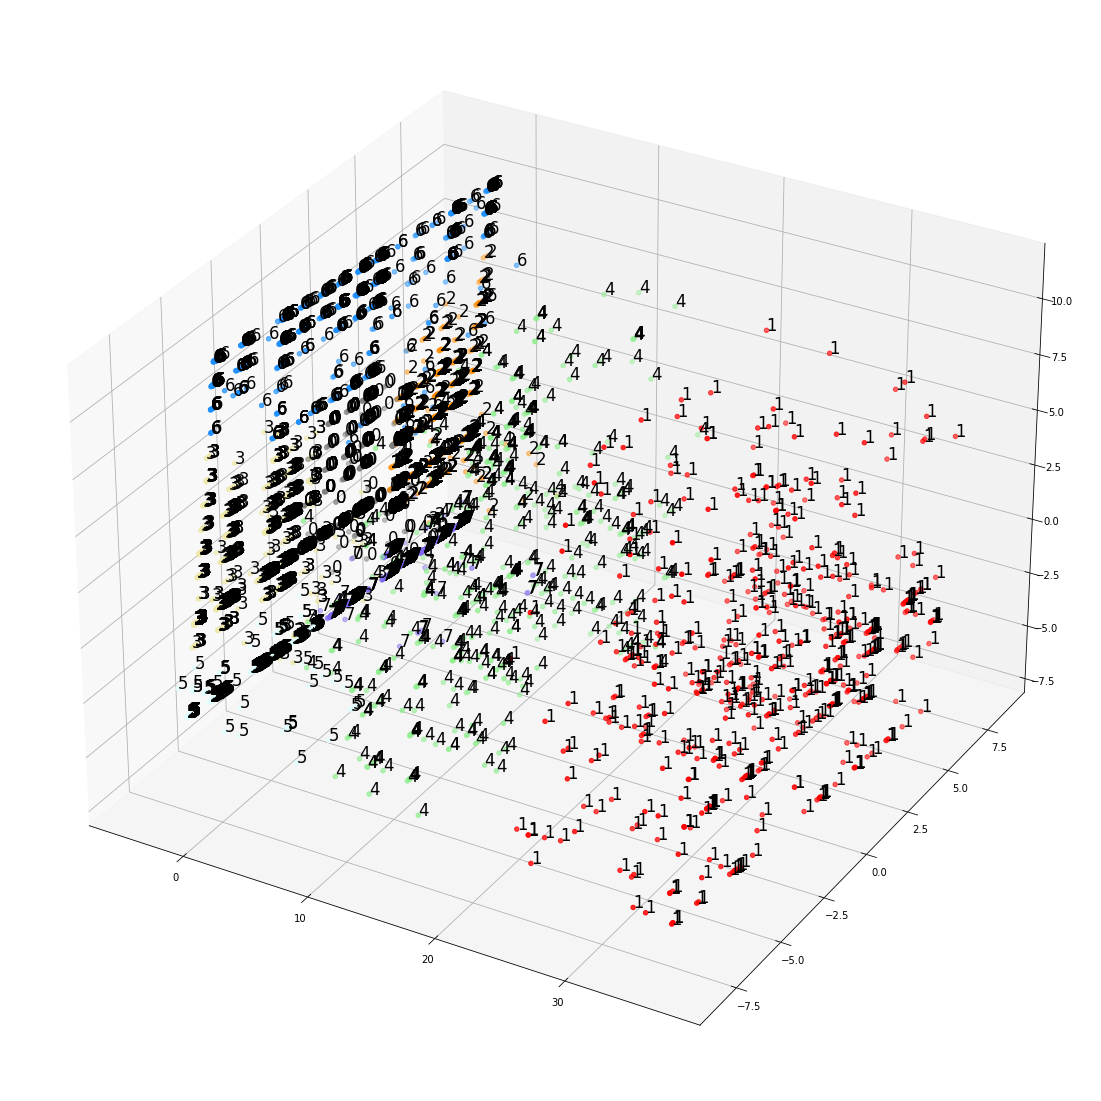

In [17]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(pca_data[0], pca_data[1], pca_data[2],
c = list(map(lambda label : cluster_colors[label],
kmeans.labels_)))

str_labels = list(map(lambda label:'% s' % label, kmeans.labels_))

list(map(lambda data1, data2, data3, str_label:
ax.text(data1, data2, data3, s = str_label, size = 16.5,
zorder = 20, color = 'k'), pca_data[0], pca_data[1],
pca_data[2], str_labels))

plt.show()
